## Investigating Fandango Movie Ratings

### Understanding the Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [2]:
fsc = pd.read_csv("fandango_score_comparison.csv")
mr16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
fsc.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
mr16_17.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Now we Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

In [5]:
previous_fsc = fsc[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
after_mr16_17 = mr16_17[['movie', 'year', 'fandango']].copy()

In [6]:
previous_fsc.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [7]:
after_mr16_17.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website.

The data we are working is sampled, one sample was to the previous to Analysis and other was after the analysis.

From Hickey's analysis article we can see the crietria for sampling,
1. The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling 
2. The movie must have had tickets on sale in 2015.

From the sampling crietria we can say that sampling was not on random basis because only movie with atleast 30 fan ratings were considered.

The sampling conditions for movie ratings 2016-2017 ,
1. The movie must have been released in 2016 or later.
2. The movie must have had a considerable number of votes and reviews.



### Changing the Goal of our Analysis

Setbacks like these are common in practical data analysis — you spend time to collect data only to find out that you haven't found exactly what you need. The worst thing you could do is to abandon the research altogether and start looking again for something new and perfect. Instead, it's much better to carry on and try to come up with creative workarounds that are good enough.

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

### Isolating the Samples We Need

With this new research goal, we have two populations of interest:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

If you explore the Fandago dataset we can see that the reviews are from 2014 or 2015, for our usage we need to isolate moive of 2014 from the data set.


In [8]:
previous_fsc.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [9]:
# We are adding a new column year to previous_fsc
previous_fsc['Year'] = previous_fsc['FILM'].str[-5:-1]
previous_fsc.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [10]:
previous_fsc['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

From the above distrubtion we can se that there are movies released on 2014.We need isolate movie reviews of 2014 form dataset

In [12]:
previous_fsc_2015 = previous_fsc[previous_fsc['Year'] == '2015'].copy()
previous_fsc_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [14]:
after_mr16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
mr16_17_2016 = after_mr16_17[after_mr16_17['year'] == 2016].copy()
mr16_17_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing Distribution Shapes for 2015 and 2016

our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

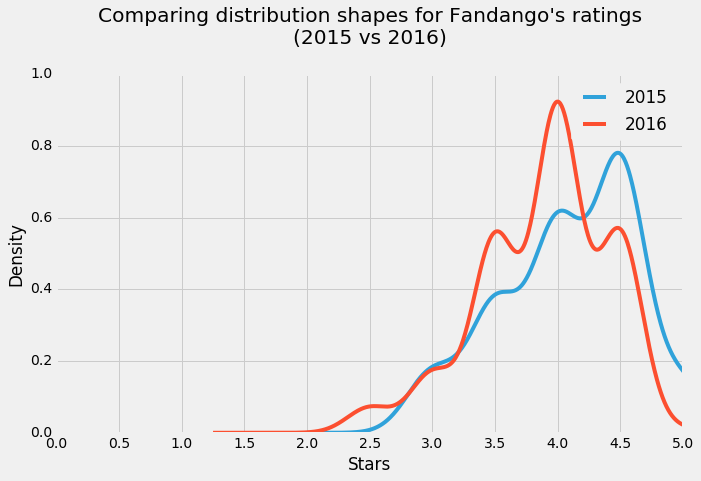

In [19]:
#We will start with KDE plots 
plt.style.use('fivethirtyeight')
previous_fsc_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True , figsize = (10,6))
mr16_17_2016['fandango'].plot.kde(label = '2016', legend = True )
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

From the KDE plot both the disturbution are left skewed and 2016 disturbution is slightly more left skewed.The left skew suggests that the rating given are more towards 3-5 
The slight left skew in 2016 shows ratings were slightly lower as compared to the 2015 distrubtion,This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

### Comparing Relative Frequencies

Moving forward from above plot we came to know that there is a difference in ratings in 2015 and 2016, now we go dipper we will analyze more granular information.

In [20]:
previous_fsc_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [21]:
mr16_17_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency disturbution there is a clear difference between 2015 and 2016,In 2016 the high ratings 4.5 and 5 have less percentage as compared to the 2015 like in 2015 there were nearly 7% of ratings were for 5 but in 2016 it was less than 1%.The minimum rating in 2015 was 3 but in case of 2016 it was 2.5.For other ratings like 3.5 and 4 have more percentages in 2016 as compared to 2015

### Determining the Direction of the Change

Lets take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [27]:
mean_2015 = previous_fsc_2015['Fandango_Stars'].mean()
median_2015 = previous_fsc_2015['Fandango_Stars'].median()
mode_2015 = previous_fsc_2015['Fandango_Stars'].mode()[0]

mean_2016 = mr16_17_2016['fandango'].mean()
median_2016 = mr16_17_2016['fandango'].median()
mode_2016 = mr16_17_2016['fandango'].mode()[0]

summary_stat = pd.DataFrame()
summary_stat['2015']  = [mean_2015, median_2015, mode_2015]
summary_stat['2016'] = [mean_2016, median_2016, mode_2016]
summary_stat.index = ['mean','median','mode']
summary_stat

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


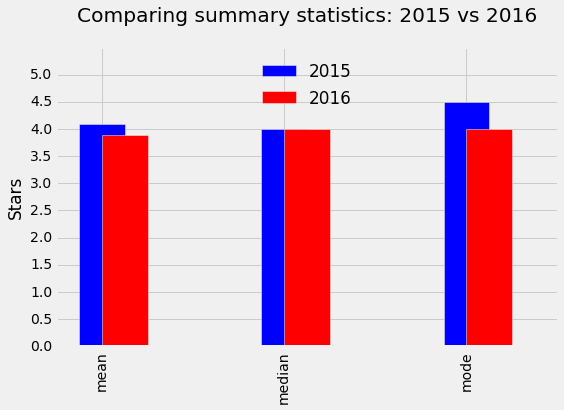

In [31]:
plt.style.use('fivethirtyeight')
summary_stat['2015'].plot.bar(color = 'Blue' , label = '2015' , legend = True , align = 'center' ,width = .25)
summary_stat['2016'].plot.bar(color = 'Red',align = 'edge', label = '2016' , legend = True , figsize = (8,5),width = .25)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.